# Demo of Regression Analysis (predicting continuously varying values)

### ( Working with Vehicle Emmissions dataset provided by CognitiveClass)

In [464]:
#PyLab combines the numerical module numpy with the graphical plotting module pyplot
#  pyLab is a convenience module that bulk imports matplotlib. many examples use it but it's not recommended 
#  pyplot (for plotting) and NumPy (for Mathematics and working with arrays) in a single name space

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl                            
import numpy as np
%matplotlib inline

In [465]:
# Use Pandas read_csv() method to read the CSV file using the URL
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
df.head()

print('\n Size of DataFrame (cells) :', df.size)
print('\n Shape of DataFrame (rows x columns):', df.shape)
print('\n Length of DataFrame (number of rows) :', len(df))



 Size of DataFrame (cells) : 13871

 Shape of DataFrame (rows x columns): (1067, 13)

 Length of DataFrame (number of rows) : 1067


In [466]:
# Display descriptive statistics
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [467]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


#### hist() of matplotlib is a powerful way to pass a dataframe to visulize the histogram of each column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD10C70588>,
      dtype=object)

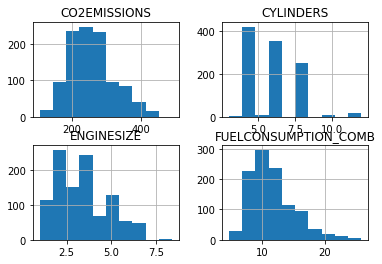

In [468]:
cdf.hist()

#### scatter() of matplotlib is a way to pass two columns of a dataframe to do a scatterplot in 2D

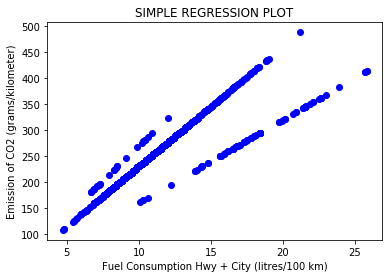

In [469]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption Hwy + City (litres/100 km)')
plt.ylabel('Emission of CO2 (grams/kilometer)')
plt.title("SIMPLE REGRESSION PLOT")
plt.show()

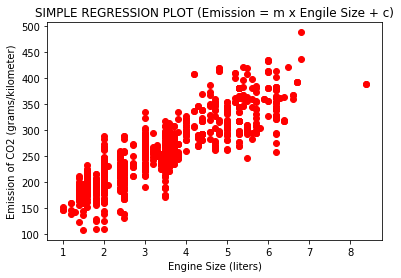

In [470]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='red')
plt.xlabel('Engine Size (liters)')
plt.ylabel('Emission of CO2 (grams/kilometer)')
plt.title('SIMPLE REGRESSION PLOT (Emission = m x Engile Size + c)')
plt.show()

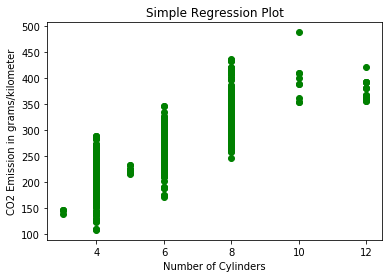

In [471]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='green')
plt.xlabel('Number of Cylinders')
plt.ylabel('CO2 Emission in grams/kilometer')
plt.title('Simple Regression Plot')
plt.show()

### Create training & test datasets (list of lists / arrays / matrices) 

In [472]:
#Create a Boolean Mask of 1s & 0s using rand() function to randomly pick the boolean value; 
#  size of the boolean mask / size of the list is = length of the DataFrame number of rows
#  the boolean mask computes to a number that is less than the size of the array
#  the compliment of boolean mask is the difference between size(length) & selection(msk)
msk = np.random.rand(len(df)) < 0.8
print('\n Contents of boolean mask = ', msk)
print('\n Size of the boolean mask = ', msk.size)

# Create a training set (list) of boolean mask (the values will be copied randomly but all values are copied)
train = cdf[msk]
print('\n Training dataset head(5): \n',train.head())
print('\n Training dataset length : ', len(train))
      
# Tilde in front of a number indicates a BitWise NOT (inversing the boolean mask/number)
test=cdf[~msk]
print('\n Testing dataset head(5): \n', test.head())
print('\n Testing dataset length : ', len(test))


 Contents of boolean mask =  [ True  True  True ... False  True  True]

 Size of the boolean mask =  1067

 Training dataset head(5): 
    ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244

 Training dataset length :  851

 Testing dataset head(5): 
     ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
5          3.5          6                  10.0           230
6          3.5          6                  10.1           232
13         5.9         12                  15.6           359
14         4.7          8                  14.7           338
17         4.7          8                  15.4           354

 Testing dataset length :  216


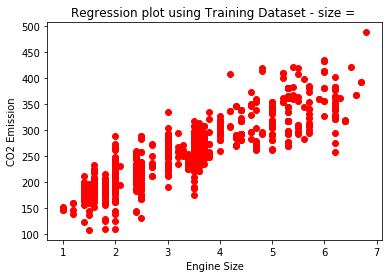

In [473]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.title('Regression plot using Training Dataset - size = ')
plt.show()

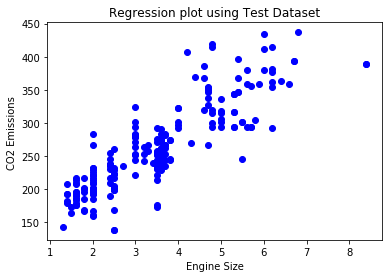

In [474]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions ')
plt.title('Regression plot using Test Dataset')
plt.show()

## Utilize Sci-Kit Learn (sklearn) a python machine learning library

### Use the linear_model module & LinearRegression() object & fit()

#### fit() method takes a matrix of independent variables & dependent variable to compute the coeffecients & the intercept (bias)

In [475]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

#The coefficients
print('Regression Line: Y = MX + C')
print('Coefficient(M): ', regr.coef_)
print('Intercept(Y):', regr.intercept_)



Regression Line: Y = MX + C
Coefficient(M):  [[39.37744039]]
Intercept(Y): [124.22943416]


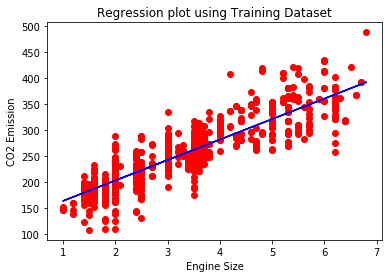

In [476]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')

# Retrieve coefficient & intercept from list using list indices & plot the line/model (y = mx + c)
#  plot the line or the model by calling pyplot, plot(x,y, '-b'); substitute mx+c for y, & use a blue line  
plt.plot(train_x, (regr.coef_[0][0]*train_x) + regr.intercept_, '-b')

plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.title('Regression plot using Training Dataset')
plt.show()

## Utilize numpy library for numerical computations on matrices - more efficient

### Utilize r2_score() of python sklearn to compute  

#### Compute  $R^2$ = ( $ 1 - {\frac{Residual Errors Squared}{Mean Errors Squared}}$ )
#### $R^2$ = ( $ 1 - {\frac{Residual Errors Squared}{Mean Errors Squared}}$ 

#### $R^2$ = $ 1 - {\frac{(Y_i - Y_f)^2 }{(Y_i - Y_m)^2}}$ 

#### Residual Errors Squared = $ (Y_i - Y_f)^2 $ , 

#### Mean Errors Squared     = $ (Y_i - Y_m)^2 $

In [477]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

# Print first element of Y hat (list), use magic symbol(%) to the value to be interpreted with 2 decimal places 
print('First value in the Y hat list is : %.2f' % test_y_hat[0])

# Use NumPy Array (Matrix) subtraction to compute the Mean Absolute Error (M.A.E)
#   use the numerical functions of NumPy library mean() & absolute()
print('M.A.E    : %.2f' % np.mean(np.absolute(test_y_hat - test_y)))

# Compute Residual Sum of Squares (Mean of Squared Errors) - has to be minimal
print('M.S.E    : %.2f ' % np.mean((test_y_hat - test_y)**2))

# Compute R square using r2_score of SciKit Learn
print('R Square : %.2f' % r2_score(test_y_hat, test_y))



First value in the Y hat list is : 262.05
M.A.E    : 24.12
M.S.E    : 1101.58 
R Square : 0.69


### Multiple Linear Regression Model 

$$ y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 $$
$$a_0 = bias, x_1 = engine size, x_2 = cylinders, x_3 = mileage; y=emissions $$


In [478]:
from sklearn import linear_model
mlr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train['CO2EMISSIONS'])
mlr.fit(x,y)

#Print The Coefficients, the Bias(intercept) & the Model
print("The Coefficients are : ", mlr.coef_)
print("The Bias factor is   : ", mlr.intercept_)


The Coefficients are :  [11.5814878   7.00185879  9.53934873]
The Bias factor is   :  66.19569202109079


In [479]:
y_hat = mlr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % mlr.score(x, y))

Residual sum of squares: 8278.79
Variance score: 0.87


## Create  TRAINING & TESTING datasets to fit the multiple linear regression model 

In [480]:
# Create a new data frame with same name, 'cdsf'
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'CO2EMISSIONS']]

#Create a Boolean Mask of 1s & 0s using rand() function to randomly pick the boolean value; 
#  size of the boolean mask / size of the list is = length of the DataFrame number of rows
#  the boolean mask computes to a number that is less than the size of the array
#  the compliment of boolean mask is the difference between size(length) & selection(msk)
msk = np.random.rand(len(cdf)) < 0.8
print('\n Contents of boolean mask = ', msk)
print('\n Size of the boolean mask = ', msk.size)

# Create a training set (list) of boolean mask (the values will be copied randomly but all values are copied)
train = cdf[msk]
print('\n Training dataset length : ', len(train))
print('\n Training dataset first 5 recs: \n\n',train.head())

# Tilde in front of a number indicates a BitWise NOT (inversing the boolean mask/number)
test=cdf[~msk]
print('\n Testing dataset length : ', len(test))
print('\n Testing dataset first 5 recs: \n\n', test.head())

# Create a new multiple linear regression instance
mlr = linear_model.LinearRegression()

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])



 Contents of boolean mask =  [False  True  True ...  True  True  True]

 Size of the boolean mask =  1067

 Training dataset length :  860

 Training dataset first 5 recs: 

    ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
1         2.4          4                  11.2                  7.7   
2         1.5          4                   6.0                  5.8   
3         3.5          6                  12.7                  9.1   
4         3.5          6                  12.1                  8.7   
5         3.5          6                  11.9                  7.7   

   CO2EMISSIONS  
1           221  
2           136  
3           255  
4           244  
5           230  

 Testing dataset length :  207

 Testing dataset first 5 recs: 

     ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          2.0          4                   9.9                  6.7   
6          3.5          6                  11.8                  8.1   
9     

In [481]:
print('First 5 rows of the transformation matrix A (coefficients): ', x[0:5])
print('First 5 rows of the modeled Vector, or the column matrix Y: ', y[0:5])


First 5 rows of the transformation matrix A (coefficients):  [[ 2.   4.   9.9  6.7]
 [ 3.5  6.  11.8  8.1]
 [ 2.4  4.  10.6  7.5]
 [ 4.7  8.  17.4 11.3]
 [ 4.7  8.  17.4 11.3]]
First 5 rows of the modeled Vector, or the column matrix Y:  [[196]
 [232]
 [212]
 [338]
 [338]]


In [482]:
# Create the regression model using the arrays
mlr.fit(x,y)

# Predict the vector 
y_hat = mlr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])

print('First 5 rows of the predicted Vector, or the column matrix :', y_hat[0:5])


First 5 rows of the predicted Vector, or the column matrix : [[199.01795477]
 [247.35831284]
 [209.01118557]
 [317.18442078]
 [317.18442078]]


In [483]:
# Print Mean of Squared (Residual)Errors
print("Residual sum of the squares for separate mileage features : %.2f"
      % np.mean((y_hat - y) ** 2))

# Print Explained variance score: 1 is perfect prediction
print('Variance in predicted score for separate mileage features : %.2f' % mlr.score(x, y))


Residual sum of the squares for separate mileage features : 431.53
Variance in predicted score for separate mileage features : 0.88


### Polynomial Regression

In [484]:
# Import PolynomialFeatures class from preprocessing libraries of Sci-Kit Learn
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Reset the DataFrame to use Highway & City Combined Mileage
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)



,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


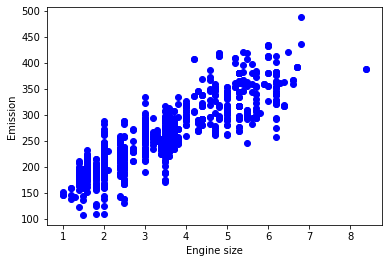

In [485]:
# Again quickly visualize the scatter plot of mapping just the engine size 
#   recall that the largest coefficient is Engine Size & hence the most significant feature
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [486]:
# Split the Data into Testing & Training Data using a random boolean mask 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Create the vectors for Training Model (simple regression - 1 variable)
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# Create the vectors for the Testing Model (simple regression - 1 variable)
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Use a 2nd degree polynomial function to fit the Training DAta (degree of polynomial is a guess)
print ('The Polynomial Equation is Y hat = a0 + a1(X) + a2(Xsq)\n')
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

print('The values of the guessed 3rd order polynomial are : \n')
train_x_poly

The Polynomial Equation is Y hat = a0 + a1(X) + a2(Xsq)

The values of the guessed 3rd order polynomial are : 



array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [487]:
# Now also fit the data to a linear regression model and compute the 3 coefficients & intercept
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('The 3 Coefficients of LR model : ', clf.coef_)
print ('The Intercept of the LR model  : ',clf.intercept_)

The 3 Coefficients of LR model :  [[ 0.         50.33310875 -1.57959304]]
The Intercept of the LR model  :  [107.85844261]


Text(0, 0.5, 'Carbon Dioxide Emissions (gms/km)')

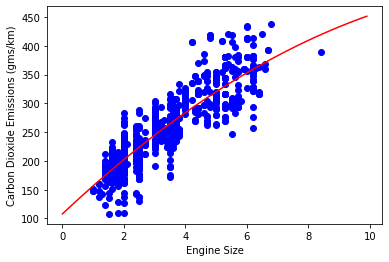

In [488]:
# Use a Scatter Plot using scatter(x,y,color='color name')
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')

# Let's assume that the coefficients are 0, 10 & 0.1 (arrange them as a numpy array)
XX = np.arange(0.0, 10.0, 0.1)

#Create a Polynomial Regression (it is an array)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)

# Add regression line to the scatter plot (layer)
plt.plot(XX, yy, '-r' )
plt.xlabel('Engine Size')
plt.ylabel('Carbon Dioxide Emissions (gms/km)')

In [489]:
# Evaluate the Errors of the polynomial regression
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.31
Residual sum of squares (MSE): 1019.41
R2-score: 0.64


##### Let us investigate errors using a third degree polynomial

In [490]:
# Use the same split of the Data from before; split into Testing & Training Data using a random boolean mask 
#msk = np.random.rand(len(df)) < 0.8
#train = cdf[msk]
#test = cdf[~msk]

# Create the vectors for Training Model (simple regression - 1 variable)
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# Create the vectors for the Testing Model (simple regression - 1 variable)
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Use a 3rd degree polynomial function to fit the Training DAta (degree of polynomial is a guess)
print ('The Polynomial Equation is Y hat = a0 + a1(X) + a2(Xsq) + a3(Xcu)\n')
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)

print('The values of the guessed 3rd order polynomial are : \n___________________________________________________\n')
train_x_poly

The Polynomial Equation is Y hat = a0 + a1(X) + a2(Xsq) + a3(Xcu)

The values of the guessed 3rd order polynomial are : 
___________________________________________________



array([[ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [491]:
# Now also fit the data to a linear regression model and compute the 4 coefficients & intercept
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print ('Coefficients : ', clf.coef_)
print ('Intercept    : ',clf.intercept_)

Coefficients :  [[ 0.         30.68586333  3.97057483 -0.47255188]]
Intercept    :  [128.25754654]


##### Fit the 3rd degree polynomial to the data

Text(0, 0.5, 'Carbon Dioxide Emissions (gms/km)')

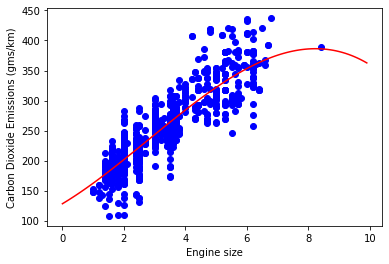

In [492]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)+ clf.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Carbon Dioxide Emissions (gms/km)")

In [493]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.16
Residual sum of squares (MSE): 1014.16
R2-score: 0.64


### Non-Linear Regression Analysis

In [494]:
# Create a numpy array with array range (ar-range), adding elements to the array 
#   starting with -5.- incrementing by 0.1, until 5.0
x = np.arange(-5.0, 5.0, 0.1)

# Print the independent numpy array 'x' to the console
x

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [495]:
print ("Create a linear equation as y = 2x + 3, where 2 is the slope & 3 is the y intercept")
##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3

# Print the dependent numpy array, 'y' to the console
y


Create a linear equation as y = 2x + 3, where 2 is the slope & 3 is the y intercept


array([-7.00000000e+00, -6.80000000e+00, -6.60000000e+00, -6.40000000e+00,
       -6.20000000e+00, -6.00000000e+00, -5.80000000e+00, -5.60000000e+00,
       -5.40000000e+00, -5.20000000e+00, -5.00000000e+00, -4.80000000e+00,
       -4.60000000e+00, -4.40000000e+00, -4.20000000e+00, -4.00000000e+00,
       -3.80000000e+00, -3.60000000e+00, -3.40000000e+00, -3.20000000e+00,
       -3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
       -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
       -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
       -6.00000000e-01, -4.00000000e-01, -2.00000000e-01, -2.48689958e-14,
        2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
        1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
        1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
        2.60000000e+00,  2.80000000e+00,  3.00000000e+00,  3.20000000e+00,
        3.40000000e+00,  

In [496]:
# Generate a numpy array of random noise using x.
#   size of the noise array is same as the size of numpy array x (hence the .size)
noise = 2 * np.random.normal(size=x.size)

# Print the noise array
noise


array([ 3.16221362,  0.32410175,  3.01089086, -4.82887251, -1.31622257,
        1.78360927, -1.82295862, -1.38044576, -1.63463449, -2.65509875,
       -1.00731548, -2.97293931, -2.72192602,  1.55368445, -1.63725965,
       -0.78114502, -0.48755278, -0.99701198, -3.08458118,  1.22310519,
       -2.28653967, -0.5457756 , -0.94590783,  1.41270009,  1.61215676,
       -1.08900421, -1.54675123,  2.29816304,  1.78096154,  1.20440178,
       -2.06582491, -2.98754799,  2.51867699,  0.49690947, -3.51185201,
       -1.41200949,  0.44051578, -0.05823891,  2.22089094,  2.19159603,
        0.6348976 ,  0.28440962,  1.34121144,  0.09489875,  0.0608654 ,
       -1.90619901, -0.64133531, -2.18714864, -0.41907771, -0.47076191,
        0.2823523 , -3.51097373, -2.05931448,  2.38138342,  1.38425954,
        0.94094033,  0.03556667,  1.48615151,  0.3861955 ,  0.05253365,
       -2.62220642,  3.06143779, -1.08427636,  0.8447041 , -1.08062783,
       -0.74546247,  2.38917251,  4.33226882, -0.48768254,  1.37

In [497]:
# Add the noise to the dependent variable & call that y_noise

noisy_y = y + noise

# Print noisy_y
noisy_y

array([-3.83778638e+00, -6.47589825e+00, -3.58910914e+00, -1.12288725e+01,
       -7.51622257e+00, -4.21639073e+00, -7.62295862e+00, -6.98044576e+00,
       -7.03463449e+00, -7.85509875e+00, -6.00731548e+00, -7.77293931e+00,
       -7.32192602e+00, -2.84631555e+00, -5.83725965e+00, -4.78114502e+00,
       -4.28755278e+00, -4.59701198e+00, -6.48458118e+00, -1.97689481e+00,
       -5.28653967e+00, -3.34577560e+00, -3.54590783e+00, -9.87299907e-01,
       -5.87843236e-01, -3.08900421e+00, -3.34675123e+00,  6.98163042e-01,
        3.80961542e-01,  4.40178241e-03, -3.06582491e+00, -3.78754799e+00,
        1.91867699e+00,  9.69094702e-02, -3.71185201e+00, -1.41200949e+00,
        6.40515778e-01,  3.41761087e-01,  2.82089094e+00,  2.99159603e+00,
        1.63489760e+00,  1.48440962e+00,  2.74121144e+00,  1.69489875e+00,
        1.86086540e+00,  9.38009911e-02,  1.55866469e+00,  2.12851357e-01,
        2.18092229e+00,  2.32923809e+00,  3.28235230e+00, -3.10973731e-01,
        1.34068552e+00,  

Text(0.5, 0, 'X Independent variable')

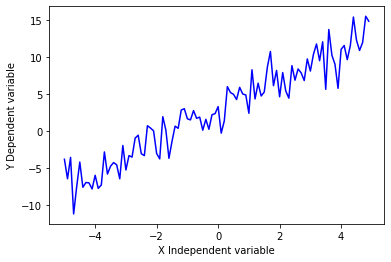

In [498]:
# Plot the noisy data using the numpy arrays x & noisy_y
plt.plot(x, noisy_y, 'b') #plots a blue zig-zag line connecting all the (x,y) coordinates
plt.ylabel('Y Dependent variable')
plt.xlabel('X Independent variable')

Text(0.5, 0, 'X Data')

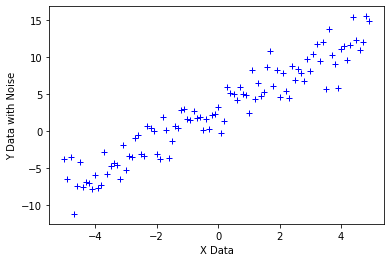

In [499]:
# Plot the noisy data using the numpy arrays x & noisy_y
plt.plot(x, noisy_y, 'b+') #scatter plot the blue + markers representing (x,y) coordinates
plt.ylabel('Y Data with Noise')
plt.xlabel('X Data')

Text(0.5, 0, 'Independent Variable')

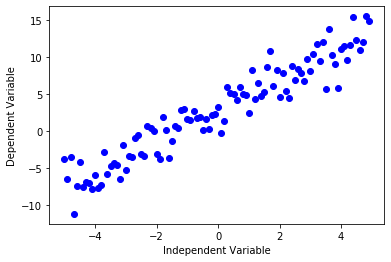

In [500]:
# Plot the noisy data using the numpy arrays x & noisy_y
plt.plot(x, noisy_y, 'bo') #scatter plot the blue circle markers representing (x,y) coordinates
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

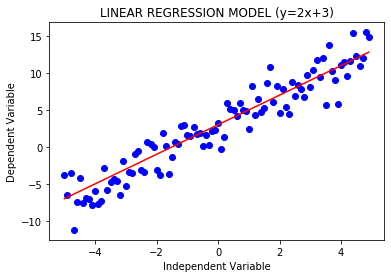

In [501]:
# Let's add a line that actually represents the y=2x+3, which is supposed to fit the scatter plot

# Plot the noisy data using the numpy arrays x & noisy_y
plt.plot(x, noisy_y, 'bo') #scatter plot the blue + markers representing (x,y) coordinates
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.title('LINEAR REGRESSION MODEL (y=2x+3)')
plt.plot(x,y,'r') # the default is a line


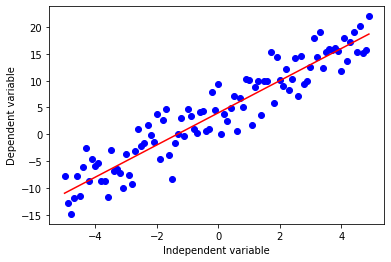

In [502]:
# What happens when we change the slope & intercept (let's say y=3x+4)
y = 3*(x) + 4

#   size of the noise array is same as the size of numpy array x (hence the .size)
#     increase the noise proportionate to coefficient of x
noise = 3 * np.random.normal(size=x.size)

# Add noise to y
noisy_y = y + noise

# Plot the data & the line

plt.plot(x, noisy_y, 'bo')
plt.ylabel('Dependent variable')
plt.xlabel('Independent variable')
plt.plot(x, y,'r')


In [503]:
# Let's invent a non-linear 3-degree polynomial function called y = cube(x) + square(x) + x + 3
y = (x**3) + (x**2) + x + 3 

# Print the new numpy array y 
y


array([-1.02000e+02, -9.55390e+01, -8.93520e+01, -8.34330e+01,
       -7.77760e+01, -7.23750e+01, -6.72240e+01, -6.23170e+01,
       -5.76480e+01, -5.32110e+01, -4.90000e+01, -4.50090e+01,
       -4.12320e+01, -3.76630e+01, -3.42960e+01, -3.11250e+01,
       -2.81440e+01, -2.53470e+01, -2.27280e+01, -2.02810e+01,
       -1.80000e+01, -1.58790e+01, -1.39120e+01, -1.20930e+01,
       -1.04160e+01, -8.87500e+00, -7.46400e+00, -6.17700e+00,
       -5.00800e+00, -3.95100e+00, -3.00000e+00, -2.14900e+00,
       -1.39200e+00, -7.23000e-01, -1.36000e-01,  3.75000e-01,
        8.16000e-01,  1.19300e+00,  1.51200e+00,  1.77900e+00,
        2.00000e+00,  2.18100e+00,  2.32800e+00,  2.44700e+00,
        2.54400e+00,  2.62500e+00,  2.69600e+00,  2.76300e+00,
        2.83200e+00,  2.90900e+00,  3.00000e+00,  3.11100e+00,
        3.24800e+00,  3.41700e+00,  3.62400e+00,  3.87500e+00,
        4.17600e+00,  4.53300e+00,  4.95200e+00,  5.43900e+00,
        6.00000e+00,  6.64100e+00,  7.36800e+00,  8.187

In [504]:
# Generate noise
noise = 20*np.random.normal(size=x.size) # 20 times the random number to accentuate the variation

# Add noise to the y
noisy_y = y + noise

# Print the noisy y numpy array
noisy_y

array([-1.28936963e+02, -9.57178295e+01, -9.71859213e+01, -1.04151336e+02,
       -7.72835206e+01, -1.01168738e+02, -5.56708963e+01, -4.42534386e+01,
       -5.36549570e+01, -5.35544381e+01, -3.65078306e+01, -4.67296683e+01,
       -5.24895229e+01, -5.65533688e+01,  8.26773421e+00, -2.07068740e+01,
       -7.30859404e+01, -5.34244402e+01,  2.79782828e+00, -2.96427880e+01,
       -2.28717791e+01,  1.82103458e+01,  2.15972561e+00,  9.37439344e-01,
        7.56662773e-02,  6.37222037e+00, -1.34255928e+01,  1.77398374e+01,
        4.78377649e+00, -2.27215452e+01,  1.31862567e+01, -3.03383577e+01,
       -2.55739865e+01, -1.34779059e+01,  1.41513935e+01,  1.63668147e+01,
       -4.54622308e+01,  1.46449822e+01,  8.08477885e+00, -9.60743681e+00,
        2.73584102e+01,  1.99118867e+01,  2.73779352e+01,  1.38689683e+01,
       -1.02606191e+01,  9.40956411e+00, -2.41424899e+01, -4.46923457e+01,
        5.26826497e+00,  9.61376880e+00,  1.10547887e+00,  3.39428543e+01,
        4.22817660e+01, -

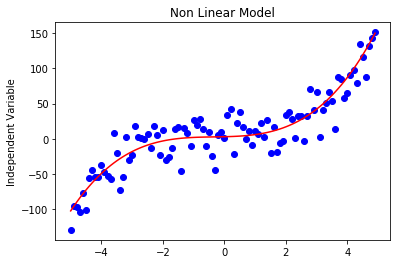

In [505]:
# Plot the noisy y data & x data (scatter plot)
plt.plot(x, noisy_y, 'bo')
plt.ylabel('Dependent Variable')
plt.ylabel('Independent Variable')
plt.title('Non Linear Model')
plt.plot(x,y,'r') #Plot the curve that is used to generate the noisy pattern

### $$ Y = (X)^2 $$

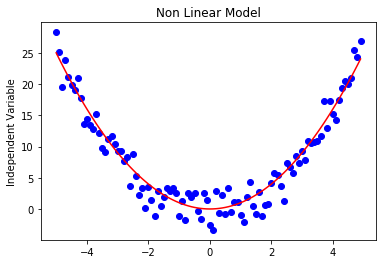

In [506]:
# Plot a quadratic expression 
y = np.power(x,2)

# Generate noise
noise = 2*np.random.normal(size=x.size) # 20 times the random number to accentuate the variation

# Add noise to the y
noisy_y = y + noise

plt.plot(x, noisy_y, 'bo')
plt.ylabel('Dependent Variable')
plt.ylabel('Independent Variable')
plt.title('Non Linear Model')

plt.plot(x,y,'r') #Plot the curve that is used to generate the noisy pattern

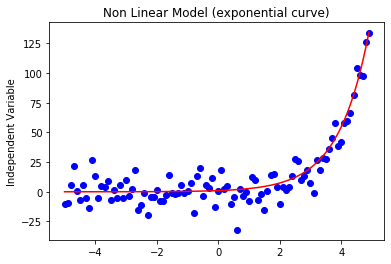

In [507]:
# Plot an exponential curve
y = np.exp(x)

# Generate noise
noise = 10*np.random.normal(size=x.size) # 20 times the random number to accentuate the variation

# Add noise to the y
noisy_y = y + noise

plt.plot(x, noisy_y, 'bo')
plt.ylabel('Dependent Variable')
plt.ylabel('Independent Variable')
plt.title('Non Linear Model (exponential curve)')


plt.plot(x,y,'r') #Plot the curve that is used to generate the noisy pattern

### $$ Y = log(X) $$

C:\Users\rahdi\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


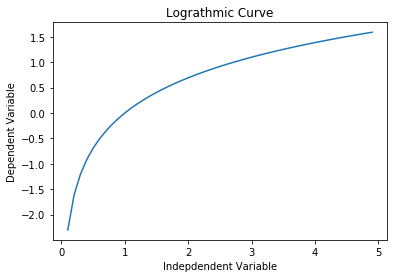

In [508]:
X = np.arange(-5.0, 5.0, 0.1)

# Generate Lograthmic model using numpy.log(X) function 
Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title('Lograthmic Curve')
plt.show()

C:\Users\rahdi\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


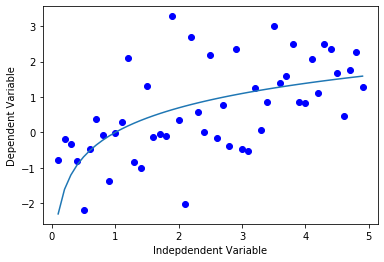

In [509]:
# Generate a numpy array
X = np.arange(-5.0, 5.0, 0.1)

# Create a Polynomial Model (Logarithmic Curve)
Y = np.log(X)

# Generate noise
noise = np.random.normal(size=X.size) # 10 times the random number to accentuate the variation

# Add noise to the y
noisy_Y = Y + noise

plt.plot(X, noisy_Y, 'bo')
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


#### Sigmoid or Logistic Function Equation : 
### $$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

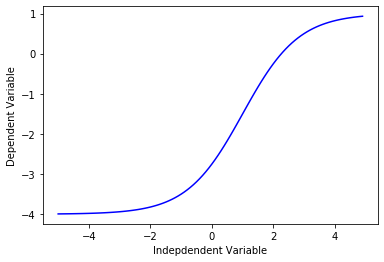

In [510]:
# Create a sigmoid function
Y = 1-5/(1+np.power(3, X-1))

plt.plot(X,Y, 'b') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logistic Function (sigmoid) is also described by the equation using 2 parameters ( $\beta_1$ & $\beta_2$ )
### $ \hat{Y} = \frac1{1+e^{(-\beta_1(X-\beta_2)}} $ 
####   - $ \beta_1$: Controls the curve's steepness,
####   - $ \beta_2$: Slides the curve on the x-axis.
 

#### Sigmoid or Logistic Function (positive realm) : 
### $$ Y(X) = \frac{1}{1+ e^{- \beta_1(X-\beta_2)}}$$

#### Creating this notebook & data was possible thanks due to a baseline source provided by IBM CognitiveClass

In [ ]:
# Create a sigmoid function
Y = 1/(1+np.exp(-X))

plt.plot(X,Y,'g') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title('Proper Sigmoid or Logistic Function')
plt.show()